Show that agents are more likely to share information with other agents with a similar leaning.
As done in this paper for Facebook and Twitter data: https://www.pnas.org/content/pnas/118/9/e2023301118.full.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from param_analysis import ParameterAnalysis
from plots import *

In [2]:

connectedness_values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ecb_precision_gammas = [2,5,9]

num_agent_values = [4,5,6,7,8]


env_precision_gammas = [10]
b_precision_gammas = [5]

n_trials = 30

In [3]:
params = ParameterAnalysis('results/testall_results_best.npz','results/testparams_best.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [13]:
params = ParameterAnalysis('results/testr2.npz','results/testp2.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [4]:
params.get_overall_metrics()

/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
test_params = [8,0.6,5,5,10]
params.update_params(test_params)
beliefs = params.all_qs

In [6]:
result = params.get_all_sim_results_from_parameters()


In [7]:
import random

In [20]:
%config InlineBackend.figure_format = 'svg'


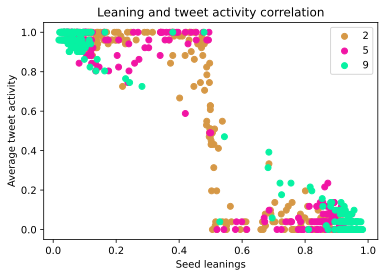

In [23]:

for ecb in ecb_precision_gammas:
    seed_leanings = []
    influence_set_leanings = []
    tweets = []

    test_params = [8,0.4,ecb,5,10]
    params.update_params(test_params)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()

    for trial in range(30):
        for agent in range(params.n_d.value):
            seed_leanings.append(np.mean(result['all_qs'][:,:,:,agent][trial,:,0]))
            tweets.append(np.mean(result['all_tweets'][trial,:,agent]))
            sampler_leaning = []
            for t in range(50):
                samplers = [ag for ag in range(params.n_d.value) if result['all_neighbour_sampling'][:,:,ag][trial][t] == agent ]
                sampler_leanings = [result['all_qs'][:,:,:,s][trial,:,0][t] for s in samplers]
                for sl in sampler_leanings:
                    sampler_leaning.append(sl)
            influence_set_leanings.append(np.mean(sampler_leaning))
    c = (random.random(), random.random(), random.random())

    plt.scatter(seed_leanings, tweets, color = c, label = ecb)
    m, b = np.polyfit(seed_leanings, tweets, 1)
    #plt.plot( seed_leanings, m* np.array(tweets)+b, c = c)
    plt.xlabel("Seed leanings")
    plt.ylabel("Average tweet activity")
    plt.legend()
    plt.title("Leaning and tweet activity correlation" )

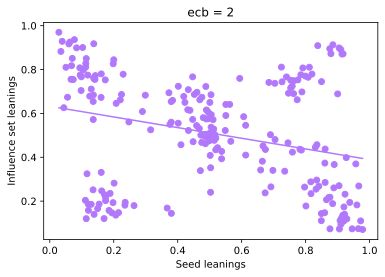

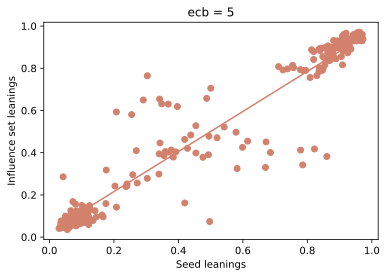

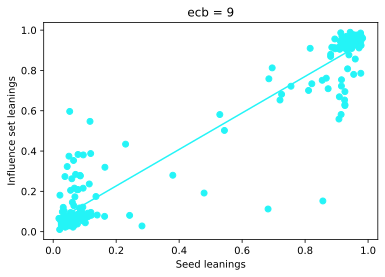

In [25]:

for ecb in ecb_precision_gammas:
    seed_leanings = []
    influence_set_leanings = []
    tweets = []

    test_params = [8,0.4,ecb,5,10]
    params.update_params(test_params)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()

    for trial in range(30):
        for agent in range(params.n_d.value):
            seed_leanings.append(np.mean(result['all_qs'][:,:,:,agent][trial,:,0]))
            tweets.append(np.mean(result['all_tweets'][trial,:,agent]))
            sampler_leaning = []
            for t in range(50):
                samplers = [ag for ag in range(params.n_d.value) if result['all_neighbour_sampling'][:,:,ag][trial][t] == agent ]
                sampler_leanings = [result['all_qs'][:,:,:,s][trial,:,0][t] for s in samplers]
                for sl in sampler_leanings:
                    sampler_leaning.append(sl)
            influence_set_leanings.append(np.mean(sampler_leaning))
    c = (random.random(), random.random(), random.random())

    plt.scatter(seed_leanings, influence_set_leanings, color = c, label = ecb)
    m, b = np.polyfit(seed_leanings, influence_set_leanings, 1)
    plt.plot( seed_leanings, m* np.array(seed_leanings)+b, c = c)
    plt.xlabel("Seed leanings")
    plt.ylabel("Influence set leanings")
    plt.title("ecb = " +str(ecb))
    plt.show()


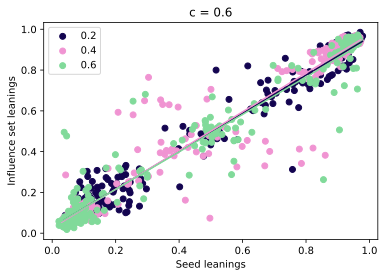

In [27]:

for cv in connectedness_values[0:-1:2]:
    seed_leanings = []
    influence_set_leanings = []

    test_params = [8,cv,5,5,10]
    params.update_params(test_params)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()

    for trial in range(30):
        for agent in range(params.n_d.value):
            seed_leanings.append(np.mean(result['all_qs'][:,:,:,agent][trial,:,0]))
            sampler_leaning = []
            for t in range(50):
                samplers = [ag for ag in range(params.n_d.value) if result['all_neighbour_sampling'][:,:,ag][trial][t] == agent ]
                sampler_leanings = [result['all_qs'][:,:,:,s][trial,:,0][t] for s in samplers]
                for sl in sampler_leanings:
                    sampler_leaning.append(sl)
            influence_set_leanings.append(np.mean(sampler_leaning))
    c = (random.random(), random.random(), random.random())

    plt.scatter(seed_leanings, influence_set_leanings, color = c, label = cv)
    m, b = np.polyfit(seed_leanings, influence_set_leanings, 1)
    plt.plot( seed_leanings, m* np.array(seed_leanings)+b, c = c)
    plt.xlabel("Seed leanings")
    plt.ylabel("Influence set leanings")
    plt.title("c = " +str(cv))
    plt.legend()

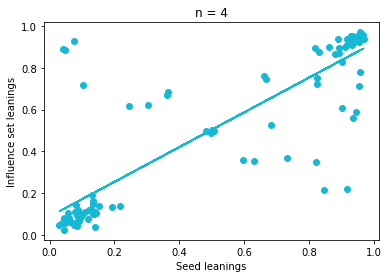

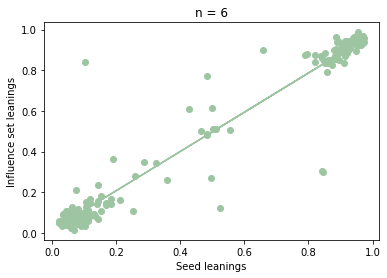

In [54]:

for n in num_agent_values[0:-1:2]:
    seed_leanings = []
    influence_set_leanings = []

    test_params = [n,0.2,5,5,10]
    params.update_params(test_params)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()

    for trial in range(30):
        for agent in range(params.n_d.value):
            seed_leanings.append(np.mean(result['all_qs'][:,:,:,agent][trial,:,0]))
            sampler_leaning = []
            for t in range(50):
                samplers = [ag for ag in range(params.n_d.value) if result['all_neighbour_sampling'][:,:,ag][trial][t] == agent ]
                sampler_leanings = [result['all_qs'][:,:,:,s][trial,:,0][t] for s in samplers]
                for sl in sampler_leanings:
                    sampler_leaning.append(sl)
            influence_set_leanings.append(np.mean(sampler_leaning))
    c = (random.random(), random.random(), random.random())
    plt.scatter(seed_leanings, influence_set_leanings, color = c, label = n)
    m, b = np.polyfit(seed_leanings, influence_set_leanings, 1)
    plt.plot( seed_leanings, m* np.array(seed_leanings)+b, c = c)
    plt.xlabel("Seed leanings")
    plt.ylabel("Influence set leanings")
    plt.title("n = " +str(n))
    plt.show()

In [65]:
result['all_tweets'][:,:,0].shape

(30, 51)

Does this also apply to the average tweet leaning, not just beliefs? Yes!

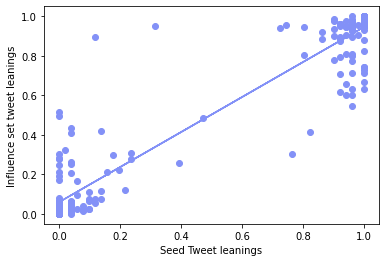

In [75]:

seed_leanings = []
influence_set_leanings = []

test_params = [8,0.4,9,5,10]
params.update_params(test_params)
beliefs = params.all_qs
result = params.get_all_sim_results_from_parameters()

for trial in range(30):
    for agent in range(params.n_d.value):
        seed_leanings.append(np.mean(result['all_tweets'][trial,:,agent]))
        sampler_leaning = []
        for t in range(50):
            samplers = [ag for ag in range(params.n_d.value) if result['all_neighbour_sampling'][:,:,ag][trial][t] == agent ]
            sampler_leanings = [result['all_tweets'][trial,:,s] for s in samplers]
            for sl in sampler_leanings:
                sampler_leaning.append(sl)
        influence_set_leanings.append(np.mean(sampler_leaning))
c = (random.random(), random.random(), random.random())

plt.scatter(seed_leanings, influence_set_leanings, color = c)
m, b = np.polyfit(seed_leanings, influence_set_leanings, 1)
plt.plot( seed_leanings, m* np.array(seed_leanings)+b, c = c)
plt.xlabel("Seed Tweet leanings")
plt.ylabel("Influence set tweet leanings")
plt.show()

Other findings: agents tend to tweet consistently the same hashtag but continue to sample both hashtags (just their own belief-hasthag more often). This plays into the more counterintuitive echo chamber behaviour found here. https://sloanreview.mit.edu/article/twitter-is-not-the-echo-chamber-we-think-it-is/
